In [1]:
import sys
sys.path.append('../..')
import src.Intern_Consistency.lda_intern_consistency as ic
import src.helper as h
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr as pcoe
from src.visualization.heatmap import plot_heatmap as phmb
import src.visualization.doc_topic_vis as vis
from src.models.topic_models import TopicModel
from src.features.vectorizer import Vectorizer
import src.data.data_loader as dl
from scipy.stats import entropy as e
import numpy as np

C:\Users\Maria\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [58]:
germ_edit = ["intern_consistency/topic_models/lda_german_editorial_articles_25.pkl",
              "intern_consistency/topic_models/lda_german_editorial_articles_50.pkl",
              "intern_consistency/topic_models/lda_german_editorial_articles_75.pkl",
              "intern_consistency/topic_models/lda_german_editorial_articles_140.pkl",
            "topic_models/lda/DEED_lda_german_editorial_articles_190.pkl",
              "intern_consistency/topic_models/lda_german_editorial_articles_240.pkl"]  

In [59]:
eng_edit =[
"intern_consistency/topic_models/lda_english_editorial_articles_25.pkl",
"intern_consistency/topic_models/lda_english_editorial_articles_50.pkl",
"intern_consistency/topic_models/lda_english_editorial_articles_75.pkl",
"intern_consistency/topic_models/lda_english_editorial_articles_80.pkl",
"topic_models/lda/ENED_lda_english_editorial_articles_130.pkl",
"intern_consistency/topic_models/lda_english_editorial_articles_180.pkl"]

In [60]:
eng_comm = ["intern_consistency/topic_models/nmf/nmf_english_editorial_comments_120.pkl",
                 "topic_models/nmf/ENEDCO_nmf_english_editorial_comments_170.pkl",
                 "intern_consistency/topic_models/nmf/nmf_english_editorial_comments_220.pkl"]

In [61]:
germ_comm = ["intern_consistency/topic_models/nmf/nmf_german_editorial_comments_120.pkl",
"topic_models/nmf/DEEDCO_nmf_german_editorial_comments_170.pkl",
"intern_consistency/topic_models/nmf/nmf_german_editorial_comments_220.pkl"]

In [62]:
eng_f = ["intern_consistency/topic_models/lda_english_forum_forum_60.pkl",
         "topic_models/lda/ENFO_lda_english_forum_110.pkl",
         "intern_consistency/topic_models/lda_english_forum_forum_160.pkl"]

In [7]:
ger_f = ["intern_consistency/topic_models/nmf/nmf_german_forum_forum_120.pkl",
         "topic_models/nmf/DEFO_nmf_german_forum_170.pkl",
        "intern_consistency/topic_models/nmf/nmf_german_forum_forum_220.pkl"]

In [8]:
def correlations(title,rangex,xlabels,a_e,a_c,a_dt,e_dt,e_c,dt_c,lda = False):
    plt.title("Correlations of "+str(title))
    plt.xlabel('Topics')
    plt.ylabel('Correlation')
    plt.xticks(range(0,rangex),xlabels)
    if lda: 
        plt.plot(range(0,rangex),[x[0] for x in a_e],label= "correlation entropy and alpha")
        plt.plot(range(0,rangex),[x[0] for x in a_c],label = "correlation alpha and coherence")
        plt.plot(range(0,rangex),[x[0] for x in a_dt],label = "correlation alpha and documents per topic")

    plt.plot(range(0,rangex),[x[0] for x in e_c],label = "correlation coherence and entropy")
    plt.plot(range(0,rangex),[x[0] for x in e_dt], label = "correlation entropy and documents per topic")
    plt.plot(range(0,rangex),[x[0] for x in dt_c],label = "correlation coherence and documents per topic")

    plt.legend(bbox_to_anchor = (0.,-0.25), loc = 2,borderaxespad =0.)
    plt.savefig("D:/Bachelorarbeit/Thesis/cleanthesis-TUM/cleanthesis-TUM/gfx/Correlation/{}.pdf".format(title), bbox_inches='tight')

In [4]:
def generate_key_figures(pkl, lda = False):
    #alpha entropy
    a_e = []
    #alpha coherence
    a_c =[]
    #alpha dt
    a_dt = []
    #entropy dt
    e_dt = []
    # entropy coherence
    e_c =[]
    
    dt_c = []

    #dt coherence
    dt_c = []
    for t in pkl:
        e = ic.get_entropy(t)
        print(t)
        x = TopicModel.load(t)
        c =x.get_topic_coherence(per_topic= True)
        document_topic_matrix, topicmodel = vis.get_document_topic_matrix(t)
        dt =(vis.amount_doc_per_topic(threshold, document_topic_matrix))
        
        if lda:
            x,a = ic.get_alphas(t)
            pt1 = pcoe(a,e)
            a_e.append(pt1)
#c und e?
        #alpha coherence
            
            pt2 = pcoe(a,c)
            a_c.append(pt2)

        #alpha dt
            
            pt3 = pcoe(a,dt)
            a_dt.append(pt3)
        
        #entropy dt
        pt4 = pcoe(e,dt)
        e_dt.append(pt4)

    #dt coherence
        pt5 = pcoe(c,dt)
        dt_c.append(pt5)

    # entropy coherence
        pt6 = pcoe(e,c)
        e_c.append(pt6)
    return a_e,a_c,a_dt,e_dt,e_c ,dt_c

In [5]:
threshold = 0.1

In [67]:

a_e,a_c,a_dt,e_dt,e_c,dt_c = generate_key_figures(eng_comm, lda= False)

2018-12-16 19:37:39,609 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-16 19:37:39,810 : INFO : built Dictionary(11948 unique tokens: ['choose', 'healthy', 'drink', 'instead', 'soda']...) from 396 documents (total 4930 corpus positions)


Epoch 10 reached after 0.247 seconds, error: 13.711248
Epoch 20 reached after 0.332 seconds, error: 13.674922
Epoch 30 reached after 0.417 seconds, error: 13.668445
Epoch 40 reached after 0.501 seconds, error: 13.666338
Epoch 50 reached after 0.579 seconds, error: 13.665440
Epoch 60 reached after 0.664 seconds, error: 13.664990
Epoch 70 reached after 0.764 seconds, error: 13.664738
Epoch 80 reached after 0.849 seconds, error: 13.664586
Epoch 90 reached after 0.918 seconds, error: 13.664489
Epoch 100 reached after 1.002 seconds, error: 13.664424
Epoch 110 reached after 1.103 seconds, error: 13.664378
Epoch 120 reached after 1.181 seconds, error: 13.664345
Epoch 130 reached after 1.281 seconds, error: 13.664321
Epoch 140 reached after 1.366 seconds, error: 13.664302
Epoch 150 reached after 1.435 seconds, error: 13.664288
Epoch 160 reached after 1.535 seconds, error: 13.664277
Epoch 170 reached after 1.604 seconds, error: 13.664269
Epoch 180 reached after 1.666 seconds, error: 13.664262
E

C:\Users\Maria\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:1035: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
2018-12-16 19:37:43,619 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-16 19:37:43,952 : INFO : built Dictionary(11948 unique tokens: ['choose', 'healthy', 'drink', 'instead', 'soda']...) from 441 documents (total 5486 corpus positions)


Epoch 10 reached after 0.344 seconds, error: 11.907524
Epoch 20 reached after 0.475 seconds, error: 11.848256
Epoch 30 reached after 0.613 seconds, error: 11.836957
Epoch 40 reached after 0.729 seconds, error: 11.833179
Epoch 50 reached after 0.876 seconds, error: 11.831541
Epoch 60 reached after 0.992 seconds, error: 11.830713
Epoch 70 reached after 1.114 seconds, error: 11.830248
Epoch 80 reached after 1.246 seconds, error: 11.829967
Epoch 90 reached after 1.408 seconds, error: 11.829786
Epoch 100 reached after 1.539 seconds, error: 11.829665
Epoch 110 reached after 1.671 seconds, error: 11.829580
Epoch 120 reached after 1.792 seconds, error: 11.829519
Epoch 130 reached after 1.923 seconds, error: 11.829474
Epoch 140 reached after 2.045 seconds, error: 11.829440
Epoch 150 reached after 2.187 seconds, error: 11.829414
Epoch 160 reached after 2.306 seconds, error: 11.829394
Epoch 170 reached after 2.438 seconds, error: 11.829377
Epoch 180 reached after 2.561 seconds, error: 11.829364
E

2018-12-16 19:37:49,099 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-16 19:37:49,315 : INFO : built Dictionary(11948 unique tokens: ['choose', 'healthy', 'drink', 'instead', 'soda']...) from 396 documents (total 4909 corpus positions)


Epoch 10 reached after 0.435 seconds, error: 10.411000
Epoch 20 reached after 0.597 seconds, error: 10.315698
Epoch 30 reached after 0.789 seconds, error: 10.296197
Epoch 40 reached after 0.950 seconds, error: 10.289303
Epoch 50 reached after 1.122 seconds, error: 10.286181
Epoch 60 reached after 1.294 seconds, error: 10.284547
Epoch 70 reached after 1.466 seconds, error: 10.283604
Epoch 80 reached after 1.635 seconds, error: 10.283019
Epoch 90 reached after 1.840 seconds, error: 10.282637
Epoch 100 reached after 2.020 seconds, error: 10.282376
Epoch 110 reached after 2.184 seconds, error: 10.282192
Epoch 120 reached after 2.365 seconds, error: 10.282059
Epoch 130 reached after 2.538 seconds, error: 10.281959
Epoch 140 reached after 2.700 seconds, error: 10.281884
Epoch 150 reached after 2.861 seconds, error: 10.281825
Epoch 160 reached after 3.033 seconds, error: 10.281779
Epoch 170 reached after 3.223 seconds, error: 10.281743
Epoch 180 reached after 3.397 seconds, error: 10.281713
E

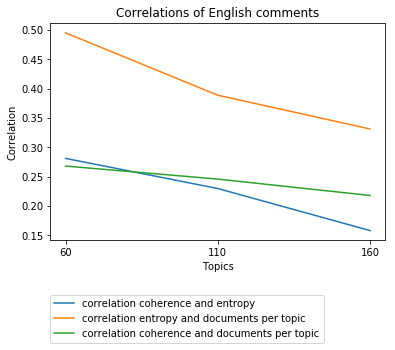

In [68]:
correlations("English comments",3,[60,110,160],a_e,a_c,a_dt,e_dt,e_c,dt_c,lda = False)

In [70]:
a_e,a_c,a_dt,e_dt,e_c,dt_c = generate_key_figures(germ_comm, lda = False)

2018-12-16 19:38:27,663 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-16 19:38:28,212 : INFO : built Dictionary(15413 unique tokens: ['meinung', 'vermitteln', 'grüne', 'bild', 'landwirtschaft']...) from 1603 documents (total 18794 corpus positions)
2018-12-16 19:38:28,434 : INFO : CorpusAccumulator accumulated stats from 1000 documents


Epoch 10 reached after 0.142 seconds, error: 20.773159
Epoch 20 reached after 0.200 seconds, error: 20.773092
Epoch 30 reached after 0.253 seconds, error: 20.773084
Epoch 40 reached after 0.314 seconds, error: 20.773082
Epoch 50 reached after 0.374 seconds, error: 20.773081
Epoch 60 reached after 0.435 seconds, error: 20.773081
Epoch 70 reached after 0.496 seconds, error: 20.773080
Epoch 80 reached after 0.557 seconds, error: 20.773080
Epoch 90 reached after 0.617 seconds, error: 20.773080
Epoch 100 reached after 0.676 seconds, error: 20.773080
Epoch 110 reached after 0.729 seconds, error: 20.773080
Epoch 120 reached after 0.787 seconds, error: 20.773080
Epoch 130 reached after 0.840 seconds, error: 20.773080


2018-12-16 19:38:31,269 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-16 19:38:31,972 : INFO : built Dictionary(15413 unique tokens: ['meinung', 'vermitteln', 'grüne', 'bild', 'landwirtschaft']...) from 1782 documents (total 20857 corpus positions)
2018-12-16 19:38:32,330 : INFO : CorpusAccumulator accumulated stats from 1000 documents


Epoch 10 reached after 0.767 seconds, error: 34.985462
Epoch 20 reached after 1.070 seconds, error: 34.961467
Epoch 30 reached after 1.343 seconds, error: 34.957539
Epoch 40 reached after 1.616 seconds, error: 34.956420
Epoch 50 reached after 1.899 seconds, error: 34.955985
Epoch 60 reached after 2.210 seconds, error: 34.955782
Epoch 70 reached after 2.505 seconds, error: 34.955674
Epoch 80 reached after 2.778 seconds, error: 34.955612
Epoch 90 reached after 3.081 seconds, error: 34.955573
Epoch 100 reached after 3.374 seconds, error: 34.955548
Epoch 110 reached after 3.647 seconds, error: 34.955530
Epoch 120 reached after 3.918 seconds, error: 34.955518
Epoch 130 reached after 4.187 seconds, error: 34.955509
Epoch 140 reached after 4.466 seconds, error: 34.955503
Epoch 150 reached after 4.751 seconds, error: 34.955498
Epoch 160 reached after 5.036 seconds, error: 34.955494
Epoch 170 reached after 5.306 seconds, error: 34.955491
Epoch 180 reached after 5.606 seconds, error: 34.955488
E

C:\Users\Maria\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:1035: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
2018-12-16 19:38:57,948 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-16 19:38:58,497 : INFO : built Dictionary(15413 unique tokens: ['meinung', 'vermitteln', 'grüne', 'bild', 'landwirtschaft']...) from 1603 documents (total 18916 corpus positions)
2018-12-16 19:38:58,785 : INFO : CorpusAccumulator accumulated stats from 1000 documents


Epoch 10 reached after 0.354 seconds, error: 20.667503
Epoch 20 reached after 0.501 seconds, error: 20.667406
Epoch 30 reached after 0.639 seconds, error: 20.667395
Epoch 40 reached after 0.786 seconds, error: 20.667392
Epoch 50 reached after 0.918 seconds, error: 20.667391
Epoch 60 reached after 1.072 seconds, error: 20.667390
Epoch 70 reached after 1.219 seconds, error: 20.667390
Epoch 80 reached after 1.357 seconds, error: 20.667390
Epoch 90 reached after 1.504 seconds, error: 20.667390
Epoch 100 reached after 1.654 seconds, error: 20.667390
Epoch 110 reached after 1.805 seconds, error: 20.667390
Epoch 120 reached after 1.946 seconds, error: 20.667390
Epoch 130 reached after 2.087 seconds, error: 20.667390
Epoch 140 reached after 2.230 seconds, error: 20.667390


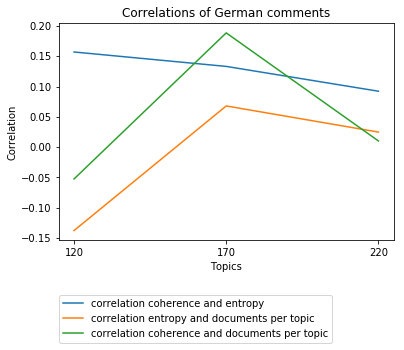

In [71]:
correlations("German comments",3,[120,170,220],a_e,a_c,a_dt,e_dt,e_c,dt_c,lda = False)

2018-12-16 19:40:42,850 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-16 19:40:43,329 : INFO : built Dictionary(5957 unique tokens: ['miss', 'view', 'actual', 'study', 'abstract']...) from 2946 documents (total 1425885 corpus positions)
2018-12-16 19:40:43,430 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2018-12-16 19:40:43,514 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2018-12-16 19:40:52,792 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-16 19:40:53,278 : INFO : built Dictionary(5970 unique tokens: ['organic', 'farm', 'better', 'suit', 'climate']...) from 2946 documents (total 1436267 corpus positions)
2018-12-16 19:40:53,409 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2018-12-16 19:40:53,541 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2018-12-16 19:41:06,317 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-16 19:41:06,825 : INFO :

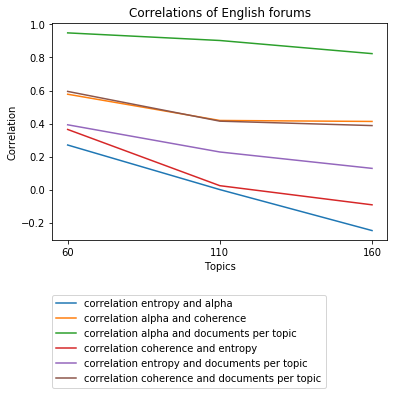

In [73]:
a_e,a_c,a_dt,e_dt,e_c,dt_c = generate_key_figures(eng_f, lda = True)
correlations("English forums",3,[60,110,160],a_e,a_c,a_dt,e_dt,e_c,dt_c,lda = True)

In [6]:
a_e,a_c,a_dt,e_dt,e_c,dt_c = generate_key_figures(ger_f, lda = False)
correlations("German forums",3,[120,170,220],a_e,a_c,a_dt,e_dt,e_c,dt_c,lda = False)

EOFError: Ran out of input

2018-12-16 19:58:40,505 : INFO : adding document #0 to Dictionary(0 unique tokens: [])


intern_consistency/topic_models/lda_german_editorial_articles_25.pkl


2018-12-16 19:58:40,984 : INFO : built Dictionary(5239 unique tokens: ['verdacht', 'experte', 'europäische_union', 'liegen', 'beweisen']...) from 4257 documents (total 765385 corpus positions)
2018-12-16 19:58:41,037 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2018-12-16 19:58:41,084 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2018-12-16 19:58:41,137 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2018-12-16 19:58:41,206 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2018-12-16 19:58:47,640 : INFO : adding document #0 to Dictionary(0 unique tokens: [])


intern_consistency/topic_models/lda_german_editorial_articles_50.pkl


2018-12-16 19:58:48,126 : INFO : built Dictionary(5239 unique tokens: ['verdacht', 'experte', 'europäische_union', 'liegen', 'beweisen']...) from 4257 documents (total 764412 corpus positions)
2018-12-16 19:58:48,188 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2018-12-16 19:58:48,242 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2018-12-16 19:58:48,320 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2018-12-16 19:58:48,373 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2018-12-16 19:58:56,233 : INFO : adding document #0 to Dictionary(0 unique tokens: [])


intern_consistency/topic_models/lda_german_editorial_articles_75.pkl


2018-12-16 19:58:56,691 : INFO : built Dictionary(5239 unique tokens: ['verdacht', 'experte', 'europäische_union', 'liegen', 'beweisen']...) from 4257 documents (total 765418 corpus positions)
2018-12-16 19:58:56,760 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2018-12-16 19:58:56,812 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2018-12-16 19:58:56,865 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2018-12-16 19:58:56,946 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2018-12-16 19:59:05,262 : INFO : adding document #0 to Dictionary(0 unique tokens: [])


intern_consistency/topic_models/lda_german_editorial_articles_140.pkl


2018-12-16 19:59:05,705 : INFO : built Dictionary(5239 unique tokens: ['verdacht', 'experte', 'europäische_union', 'liegen', 'beweisen']...) from 4257 documents (total 764412 corpus positions)
2018-12-16 19:59:05,805 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2018-12-16 19:59:05,874 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2018-12-16 19:59:05,937 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2018-12-16 19:59:06,006 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2018-12-16 19:59:17,461 : INFO : adding document #0 to Dictionary(0 unique tokens: [])


topic_models/lda/DEED_lda_german_editorial_articles_190.pkl


2018-12-16 19:59:17,880 : INFO : built Dictionary(5239 unique tokens: ['verdacht', 'experte', 'europäische_union', 'liegen', 'beweisen']...) from 4257 documents (total 765385 corpus positions)
2018-12-16 19:59:17,980 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2018-12-16 19:59:18,043 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2018-12-16 19:59:18,112 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2018-12-16 19:59:18,181 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2018-12-16 19:59:29,289 : INFO : adding document #0 to Dictionary(0 unique tokens: [])


intern_consistency/topic_models/lda_german_editorial_articles_240.pkl


2018-12-16 19:59:29,707 : INFO : built Dictionary(5239 unique tokens: ['verdacht', 'experte', 'europäische_union', 'liegen', 'beweisen']...) from 4257 documents (total 765418 corpus positions)
2018-12-16 19:59:29,817 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2018-12-16 19:59:29,891 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2018-12-16 19:59:29,960 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2018-12-16 19:59:30,024 : INFO : CorpusAccumulator accumulated stats from 4000 documents


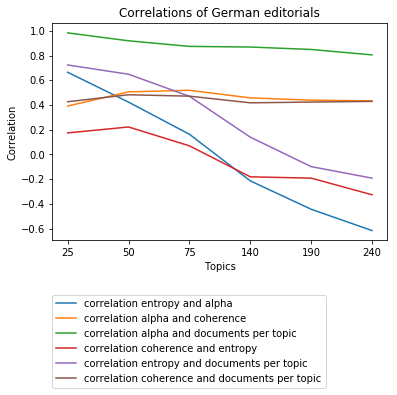

In [84]:
a_e,a_c,a_dt,e_dt,e_c,dt_c = generate_key_figures(germ_edit, lda = True)
correlations("German editorials",6,[25,50,75,140,190,240],a_e,a_c,a_dt,e_dt,e_c,dt_c,lda = True)

2018-12-16 19:51:42,495 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-16 19:51:42,912 : INFO : built Dictionary(6254 unique tokens: ['mcdonald', 'happy', 'bit', 'healthy', 'start']...) from 2110 documents (total 849140 corpus positions)
2018-12-16 19:51:43,012 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2018-12-16 19:51:43,097 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2018-12-16 19:51:47,714 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-16 19:51:48,128 : INFO : built Dictionary(6254 unique tokens: ['mcdonald', 'happy', 'bit', 'healthy', 'start']...) from 2110 documents (total 849251 corpus positions)
2018-12-16 19:51:48,228 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2018-12-16 19:51:48,328 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2018-12-16 19:51:53,017 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-16 19:51:53,391 : INFO : 

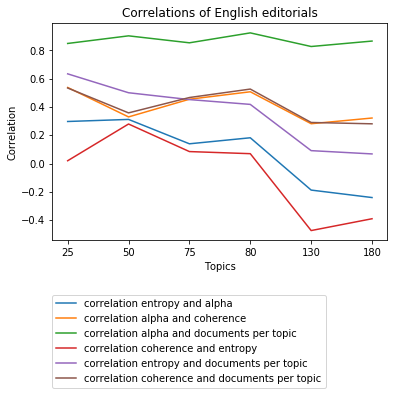

In [79]:
a_e,a_c,a_dt,e_dt,e_c,dt_c = generate_key_figures(eng_edit, lda = True)
correlations("English editorials",6,[25,50,75,80,130,180],a_e,a_c,a_dt,e_dt,e_c,dt_c,lda = True)